<a href="https://colab.research.google.com/github/swanandiparnaik/DS_assignment/blob/main/Forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prices= pd.read_excel("/content/Crude Oil Prices Daily(final).xlsx")
prices

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9546,2023-10-04,84.37
9547,2023-10-05,82.89
9548,2023-10-06,82.79
9549,2023-10-09,86.45


In [3]:
prices.shape

(9551, 2)

In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9551 non-null   datetime64[ns]
 1   Closing Value  9544 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.4 KB


In [6]:
prices['Date']=pd.to_datetime(prices['Date'])

In [8]:
prices.dtypes

Date             datetime64[ns]
Closing Value           float64
dtype: object

In [9]:
prices.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [20]:
##setting date value as a index
##prices.set_index(prices['Date'], inplace = True)
prices.drop(prices.columns[0],axis=1)

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2023-10-04,84.37
2023-10-05,82.89
2023-10-06,82.79


In [21]:
##converting negative closing value to positive
prices['Closing Value']=prices['Closing Value'].map(lambda x:abs(x))

In [22]:
prices.describe()

,Closing Value
count,9544.000000
mean,46.761018
std,29.626143
min,10.250000
25%,20.090000
50%,37.640000
75%,69.305000
max,145.310000


In [23]:
prices[prices.duplicated()]

,Date,Closing Value
Date,,


In [24]:
prices.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [25]:
mean=prices['Closing Value'].mean()  ##to handle numerical missing value use mean imputation
print(mean)

46.761017717937975


In [26]:
prices['Closing Value']=prices['Closing Value'].fillna(mean)

In [27]:
prices['Closing Value'].isnull().sum()

0

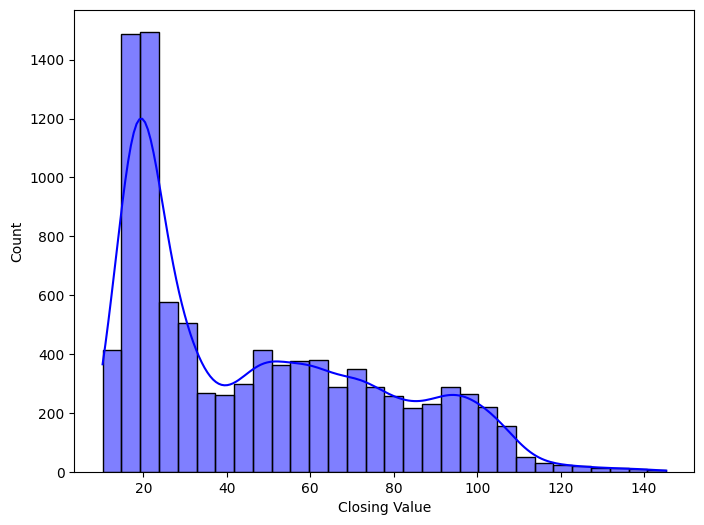

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(prices['Closing Value'], kde=True,color='blue')
plt.show()

<Axes: xlabel='Closing Value'>

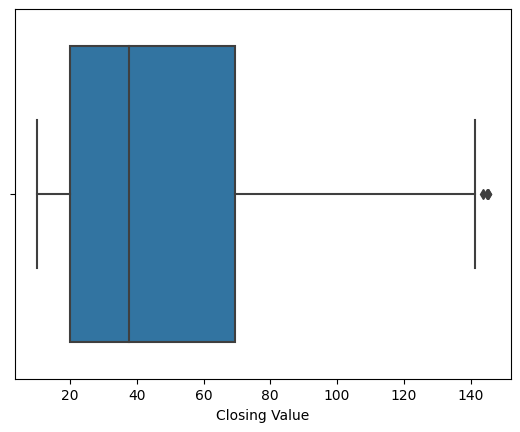

In [34]:
sns.boxplot(x=prices["Closing Value"])

In [36]:
##there are some outliers ahed 140
print(np.where(prices['Closing Value']>140))

(array([5676, 5677, 5678, 5679, 5682, 5683, 5684]),)


In [37]:
outliers = prices[prices['Closing Value']>140]
print(outliers)

                 Date  Closing Value
Date                                
2008-07-01 2008-07-01         141.06
2008-07-02 2008-07-02         143.74
2008-07-03 2008-07-03         145.31
2008-07-07 2008-07-07         141.38
2008-07-10 2008-07-10         141.47
2008-07-11 2008-07-11         144.96
2008-07-14 2008-07-14         145.16


In [40]:
##removing outliers
ClosingValue=prices['Closing Value']
##interquartile range
q1=ClosingValue.quantile(0.25)
q3=ClosingValue.quantile(0.75)
IQR = q3-q1
##lower and upper bounds
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

ClosingValue=np.where(ClosingValue<lower_bound,lower_bound,ClosingValue)
ClosingValue=np.where(ClosingValue>upper_bound,upper_bound,ClosingValue)
print("upper_bound",upper_bound)
print("lower_bound",lower_bound)

prices['Closing Value']=ClosingValue



upper_bound 143.115
lower_bound -53.724999999999994


<Axes: xlabel='Closing Value'>

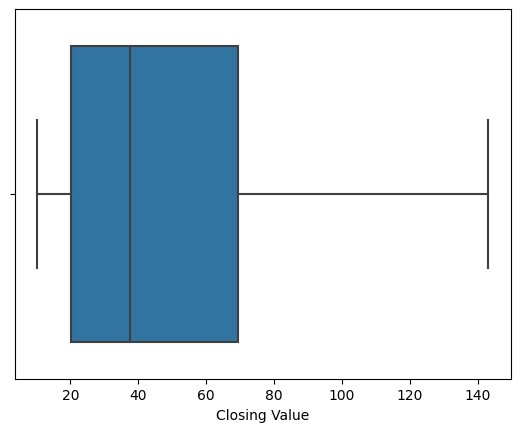

In [41]:
sns.boxplot(x=prices["Closing Value"])

##as we can see there are no outliers